In [28]:
import pandas as pd
d=pd.read_csv("/content/Car Data.csv")
print(d)
print(d.dtypes)

      Car ID      Brand     Model  Year   Color  Mileage  Price       Location
0          1     Toyota     Camry  2018   White    45000  18000    Los Angeles
1          2      Honda     Civic  2019    Blue    35000  16000       New York
2          3       Ford     Focus  2017  Silver    55000  14000        Chicago
3          4  Chevrolet     Cruze  2016     Red    60000  12000          Miami
4          5    Hyundai   Elantra  2018   Black    40000  15000  San Francisco
...      ...        ...       ...   ...     ...      ...    ...            ...
1995    1996    Hyundai  Palisade  2019  Silver    65000  22000  San Francisco
1996    1997     Toyota    Sienna  2018     Red    55000  16000         Dallas
1997    1998      Honda       Fit  2018    Gray    50000  14000        Atlanta
1998    1999       Ford    Fusion  2017   White    55000  19000        Phoenix
1999    2000  Chevrolet    Malibu  2016    Blue    30000  23000        Houston

[2000 rows x 8 columns]
Car ID       int64
Brand   

In [29]:
z = d[['Mileage', 'Price']]
print(z)
print(d.dtypes)

      Mileage  Price
0       45000  18000
1       35000  16000
2       55000  14000
3       60000  12000
4       40000  15000
...       ...    ...
1995    65000  22000
1996    55000  16000
1997    50000  14000
1998    55000  19000
1999    30000  23000

[2000 rows x 2 columns]
Car ID       int64
Brand       object
Model       object
Year         int64
Color       object
Mileage      int64
Price        int64
Location    object
dtype: object


In [30]:
y=z['Price']
print(y)
print(d.dtypes)

0       18000
1       16000
2       14000
3       12000
4       15000
        ...  
1995    22000
1996    16000
1997    14000
1998    19000
1999    23000
Name: Price, Length: 2000, dtype: int64
Car ID       int64
Brand       object
Model       object
Year         int64
Color       object
Mileage      int64
Price        int64
Location    object
dtype: object


In [31]:
x=z.drop('Price',axis=1)
print(x)
print(d.dtypes)

      Mileage
0       45000
1       35000
2       55000
3       60000
4       40000
...       ...
1995    65000
1996    55000
1997    50000
1998    55000
1999    30000

[2000 rows x 1 columns]
Car ID       int64
Brand       object
Model       object
Year         int64
Color       object
Mileage      int64
Price        int64
Location    object
dtype: object


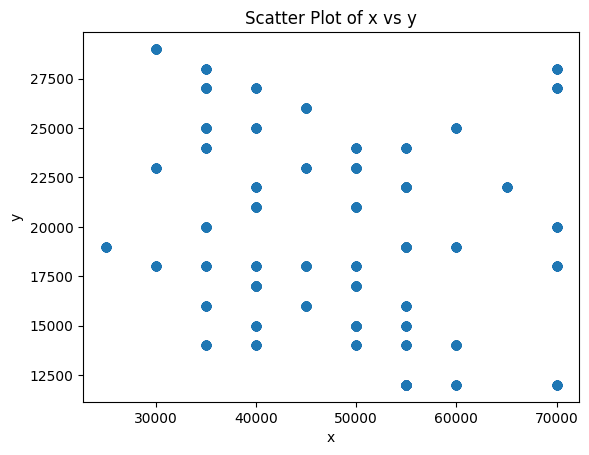

In [41]:
import matplotlib.pyplot as plt

plt.scatter(x, y)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Scatter Plot of x vs y")
plt.show()

In [32]:
z1=x-x.min()/(x.max()-x.min())
print(z1)

           Mileage
0     44999.444444
1     34999.444444
2     54999.444444
3     59999.444444
4     39999.444444
...            ...
1995  64999.444444
1996  54999.444444
1997  49999.444444
1998  54999.444444
1999  29999.444444

[2000 rows x 1 columns]


In [33]:
summary = z.describe(percentiles=[.25, .50, .75, .90])
print(summary)

            Mileage         Price
count   2000.000000   2000.000000
mean   47452.500000  19605.000000
std    11016.279906   4777.592249
min    25000.000000  12000.000000
25%    40000.000000  16000.000000
50%    50000.000000  19000.000000
75%    55000.000000  23000.000000
90%    60000.000000  27000.000000
max    70000.000000  29000.000000


In [34]:
print(z.columns)

Index(['Mileage', 'Price'], dtype='object')


In [35]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)
x_scaled = scaler.transform(x)

In [36]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=1)

In [37]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)

y_pred = knn.predict(x_test)
y_pred1=knn.predict(x_train)

print(y_pred)
print()
print(y_pred1)

[22000 22000 15000 15000 14000 14000 22000 22000 22000 14000 19000 15000
 25000 18000 22000 18000 14000 18000 18000 14000 25000 14000 14000 14000
 18000 18000 25000 15000 22000 14000 18000 14000 22000 18000 19000 22000
 14000 14000 22000 18000 18000 14000 22000 22000 14000 14000 14000 15000
 14000 25000 18000 14000 15000 22000 18000 18000 15000 18000 22000 18000
 18000 25000 22000 25000 22000 18000 18000 18000 15000 25000 14000 14000
 14000 18000 18000 25000 18000 22000 14000 18000 14000 22000 14000 22000
 25000 18000 15000 15000 14000 18000 14000 18000 25000 18000 22000 18000
 15000 18000 25000 22000 15000 15000 18000 18000 25000 15000 15000 18000
 22000 22000 15000 15000 18000 14000 18000 19000 14000 22000 25000 14000
 18000 18000 25000 15000 14000 14000 14000 22000 14000 14000 22000 22000
 14000 14000 25000 18000 18000 18000 18000 14000 22000 18000 15000 14000
 14000 25000 22000 14000 22000 15000 18000 18000 18000 18000 25000 25000
 14000 22000 18000 22000 18000 18000 14000 22000 22

In [38]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))
print(accuracy_score(y_train, y_pred1))

0.1825
0.220625


In [39]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 0  6  0  0  0  5  0  0  0 24  0  0  0  0  0  0  0]
 [ 0 13  8  0  0  0  0  0  0  6  0  0  4  0  0  0  0]
 [ 0 21  6  0  0  0  0  0  0  8  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  9  0  0  0  9  0  0  3  0  0  0  0]
 [ 0 16 11  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  2  9  0  0 22  0  0  0  0  0  0  4  0  0  0  0]
 [ 0  5  0  0  0  0  7  0  0 18  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  6  0  0  0  0  0  0 11  0  0  0  0]
 [ 0 13 12  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  2  0  0  0  0  0  0 17  0  0  0  0  0  0  0]
 [ 0  8  0  0  0 13  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  5  0  0  0  0  0  0  0  8  0  0  8  0  0  0  0]
 [ 0  3  5  0  0  0  0  0  0  0  0  0  8  0  0  0  0]
 [ 0  0  0  0  0 13  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  7  0  0 10  0  0  0  0  0  0  9  0  0  0  0]
 [ 0  0  0  0  0 10  0  0  0  0  0  0  3  0  0  0  0]
 [ 0  0  0  0  0 13  0  0  0  0  0  0  0  0  0  0  0]]


In [40]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

       12000       0.00      0.00      0.00        35
       14000       0.14      0.42      0.21        31
       15000       0.10      0.17      0.13        35
       16000       0.00      0.00      0.00        21
       17000       0.00      0.00      0.00        27
       18000       0.22      0.59      0.32        37
       19000       1.00      0.23      0.38        30
       20000       0.00      0.00      0.00        17
       21000       0.00      0.00      0.00        25
       22000       0.19      0.89      0.31        19
       23000       0.00      0.00      0.00        21
       24000       0.00      0.00      0.00        21
       25000       0.16      0.50      0.24        16
       26000       0.00      0.00      0.00        13
       27000       0.00      0.00      0.00        26
       28000       0.00      0.00      0.00        13
       29000       0.00      0.00      0.00        13

    accuracy              

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
